<a href="https://colab.research.google.com/github/Jaeljane/Attendance_Prediction/blob/main/Attendance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Attendance_2.csv')
df=data.copy()
print(df.shape)
df.head()

(21912, 12)


,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,12/10/2023,Thursday,Unscheduled,Unscheduled,Other Reasons,A001,T001,>24M,Oct,2,NH,Not_assosiated_with_Holiday
1,12/10/2023,Thursday,Day,Present,Other Reasons,A002,T002,12-24M,Oct,2,NH,Not_assosiated_with_Holiday
2,12/10/2023,Thursday,Day,Present,Other Reasons,A003,T003,>24M,Oct,2,NH,Not_assosiated_with_Holiday
3,12/10/2023,Thursday,Day,Present,Other Reasons,A004,T004,>24M,Oct,2,NH,Not_assosiated_with_Holiday
4,12/10/2023,Thursday,Day,Present,Other Reasons,A005,T005,>24M,Oct,2,NH,Not_assosiated_with_Holiday


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 21912 non-null  object
 1   day                  21911 non-null  object
 2   shift                21912 non-null  object
 3   attendance           21912 non-null  object
 4   Reasons              21912 non-null  object
 5   Employee_Id          21866 non-null  object
 6   Team                 21912 non-null  object
 7   Tenure               21677 non-null  object
 8   Month                21912 non-null  object
 9   Week_Numb            21912 non-null  int64 
 10  Holiday              21912 non-null  object
 11  Holiday_Association  21912 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


In [31]:
df['date']=pd.to_datetime(df['date'], format='%d/%m/%Y')
#sort data to be in descending order
df=df.sort_values(by='date')
df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
21911,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday
21794,2023-04-28,Friday,Unscheduled,PTO,Other Reasons,NaN,T005,NaN,Apr,5,NH,Not_assosiated_with_Holiday
21793,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday
21792,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday
21791,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday


###EDA

In [35]:
df['attendance'].value_counts()

Present    19742
Absent       760
Name: attendance, dtype: int64

We are only interested in Employees who were Present and those who were absent and not those who were on leave cause in this case PTO and Unscheduled implies that the employee was on planned leave hence we would have to remove these records before doing any further analysis

In [34]:
retain=["Present", "Absent"]

 # df=df[df['attendance'].isin(i)]
df = df[df['attendance'].isin(retain)]


In [40]:
#Check for null values
df.isnull().sum()

date                     0
day                      1
shift                    0
attendance               0
Reasons                  0
Employee_Id             34
Team                     0
Tenure                 218
Month                    0
Week_Numb                0
Holiday                  0
Holiday_Association      0
dtype: int64

In [45]:
#check those employees missing Employee ID

a=df[df['Employee_Id'].isnull()]
a.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
21764,2023-04-28,Friday,Night,Absent,Unplanned Leave,NaN,T007,NaN,Apr,5,NH,Not_assosiated_with_Holiday
21761,2023-04-28,Friday,Night,Absent,Unplanned Leave,NaN,T009,NaN,Apr,5,NH,Not_assosiated_with_Holiday
21753,2023-04-28,Friday,Night,Present,Other Reasons,NaN,T012,NaN,Apr,5,NH,Not_assosiated_with_Holiday
21446,2023-05-02,Tuesday,Night,Absent,Unplanned Leave,NaN,T007,NaN,May,1,NH,After Holiday
21583,2023-05-02,Tuesday,Night,Present,Other Reasons,NaN,T012,NaN,May,1,NH,After Holiday


Since we are trying to predict individual employee attendance, it will not be useful having records that miss employee ID hence we would have to drop these records.

In [48]:
df = df[~df['Employee_Id'].isnull()]

In [79]:
df['shift'].replace('Unscheduled', "Day", inplace =True)

In [80]:
df_a=df[df['attendance']=="Absent"]
df_a.shape

(745, 12)

<Axes: title={'center': 'Reasons for Absenteeism'}>

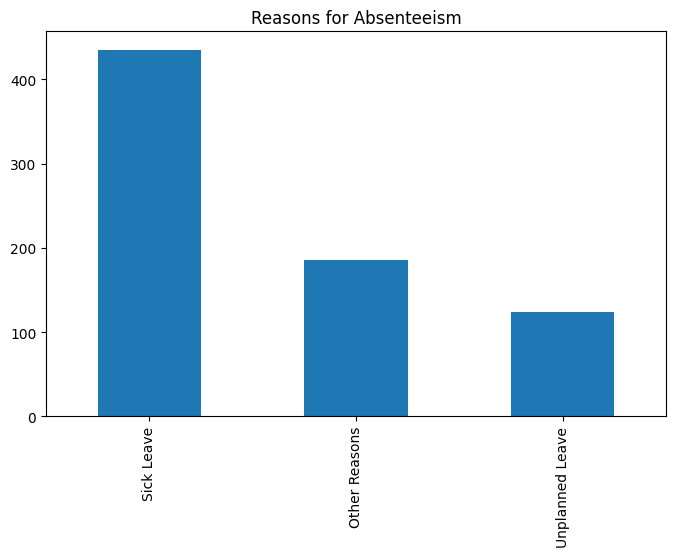

In [81]:
df_a['Reasons'].value_counts().plot(figsize=(8,5),kind="bar", title="Reasons for Absenteeism")

Sick leaves are the most common reason for absenteeism within employees


In [82]:
def proportions(x):
  a=df_a[x].value_counts()
  b=df[x].value_counts()
  c= a.index.union(b.index)

  value_counts_df = b.reindex(c, fill_value=0)
  value_counts_df_a = a.reindex(c, fill_value=0)
  proportions=value_counts_df_a/value_counts_df


  return proportions

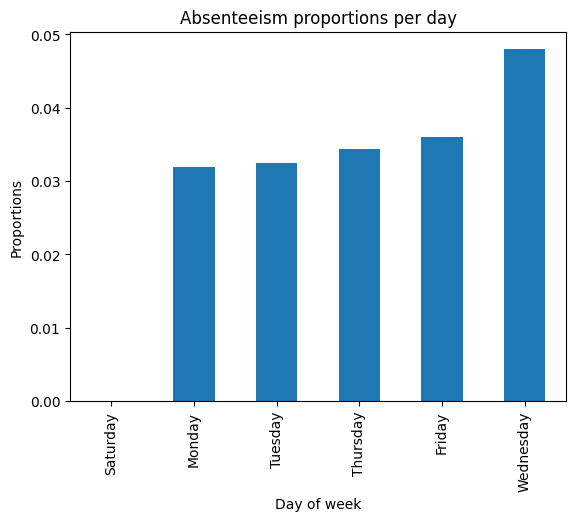

In [83]:
day=proportions('day')
day.sort_values().plot(kind="bar",title= "Absenteeism proportions per day", xlabel="Day of week", ylabel="Proportions");

Saturday is not a working day and if anywork is done on this particular day it is considered Overtime work and should be voluntary.
Wednesday on the other hand has the highest rate of absenteeism

In [84]:
i=df_a[df_a['shift']=="Unscheduled"]
i

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association


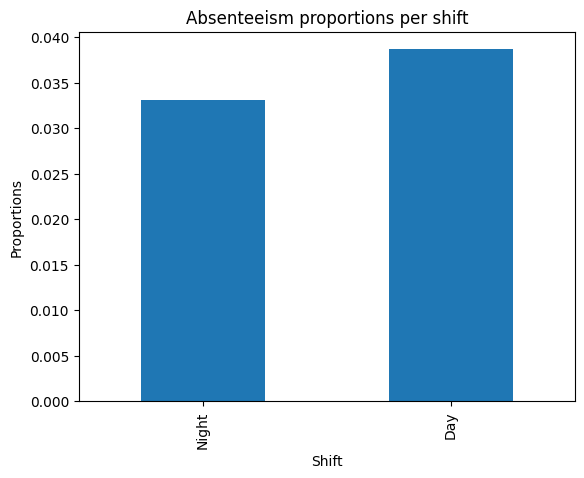

In [85]:
shift=proportions('shift')
shift.sort_values().plot(kind="bar",title= "Absenteeism proportions per shift", xlabel="Shift", ylabel="Proportions");

The day shift has the highest proportion of absenteeism

In [87]:
team=proportions("Team").sort_values()
Tenure=proportions('Tenure').sort_Values()
Month=proportions("Month")
Week_Numb=("Week_Numb")

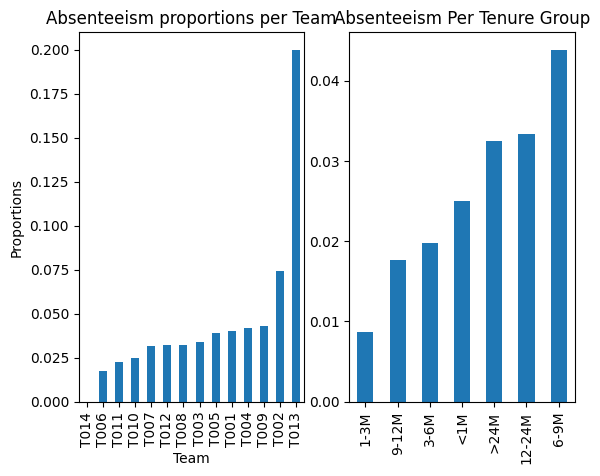

In [95]:
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)

# Plot data from the DataFrame on the subplots
team.sort_values().plot(kind="bar", xlabel="Team", ylabel="Proportions", ax=axs[0])
axs[0].set_title("Absenteeism proportions per Team")

Tenure.sort_values().plot(kind="bar" ,ax=axs[1])
axs[1].set_title("Absenteeism Per Tenure Group")

# Show the figure
plt.show()






